In [1]:
import xlrd
from numpy import *
from scipy import *
import numpy as np
from matplotlib.pyplot import *

import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

rc('text',usetex = True)
rc('font', family='serif',size = 12)

In [27]:
Data = xlrd.open_workbook('Results_.xlsx') #Import inputs File
Inputs = Data.sheet_by_name('Data') 

vs   = array(Inputs.col_values(0)) #Import AMR Length [mm]
dP   = array(Inputs.col_values(1)) #Import AMR Height [mm]
vs_CB   = array(Inputs.col_values(2)) #Import AMR Length [mm]
dP_CB   = array(Inputs.col_values(3)) #Import AMR Height [mm]
Re_HB   = array(Inputs.col_values(4)) #Import AMR Length [mm]
Re_CB   = array(Inputs.col_values(5)) #Import AMR Height [mm]

In [28]:
Re = np.arange(0,25)

In [29]:
Inputs = Data.sheet_by_name('Data_8') 

vs_8   = array(Inputs.col_values(0)) #Import AMR Length [mm]
dP_8   = array(Inputs.col_values(1)) #Import AMR Height [mm]
Re_8   = array(Inputs.col_values(2)) #Import AMR Length [mm]

In [31]:
L = 50*10**-3
rho = 1000
d_p = 500*10**-6

In [32]:
def fit_int(X,a,b,Epsilon): 
    vs =  X
    #Epsilon = 0.465
    #Epsilon = 0.37
    mu_f = 0.0007
    dp = 0.0005
    rho_f = 1000
    
    return (a*(1-Epsilon)**2/Epsilon**3*mu_f*vs/dp**2 + b*(1-Epsilon)/Epsilon**3*rho_f*vs**2/(dp))

In [33]:
Coef = curve_fit(fit_int,(vs),1000*dP/(50*10**-3),maxfev=10000)
Coef

(array([38.63354658,  0.93401013,  0.25816789]),
 array([[8.64691316e+13, 1.89365185e+12, 1.56337632e+11],
        [1.89365185e+12, 4.14704907e+10, 3.42375412e+09],
        [1.56337632e+11, 3.42375412e+09, 2.82661046e+08]]))

In [34]:
aux = np.arange(0,30)

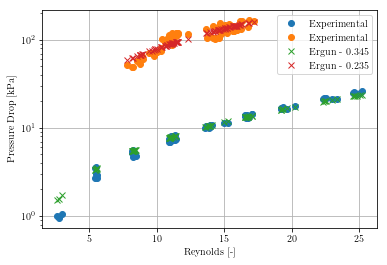

In [50]:
plt.semilogy(Re_HB,dP,'o',label = 'Experimental')
plt.semilogy(Re_8,dP_8,'o',label = 'Experimental')
#plt.plot(Re_CB,dP_CB,'o',label = 'Cold Blow')
semilogy(Re_HB,fit_int(vs,150,1.75,0.345)*(50*10**-3)/1000,'x',label = 'Ergun - 0.345')
semilogy(Re_8,fit_int(vs_8,150,1.75,0.235)*(100*10**-3)/1000,'x',label = 'Ergun - 0.235')
#plot(Re_HB,fit_int(vs,150,1.75,0.465)*(50*10**-3)/1000,'x',label = 'Ergun - 0.465')
#plot(Re_HB,fit_int(vs,9/4*150,3/2*1.75)*(50*10**-3)/1000,'x',label = 'Ergun (?)')
#plot(Re_HB,fit_int(vs,Coef[0][0],Coef[0][1],0.37)*(50*10**-3)/1000,'x',label = 'Modified')
plt.legend()
plt.grid()
plt.xlabel('Reynolds [-]')
plt.ylabel('Pressure Drop [kPa]')
plt.savefig('dP.png',format = 'png', dpi=500,bbox_inches='tight')

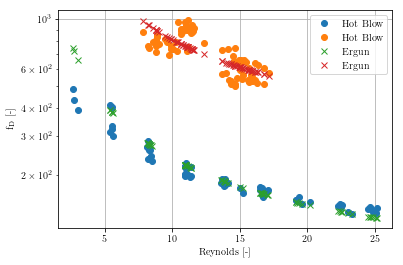

In [57]:
plt.semilogy(Re_HB,dP*1000/L*2*d_p/(rho*vs**2),'o',label = 'Hot Blow')
plt.semilogy(Re_8,dP_8*1000/(2*L)*2*d_p/(rho*vs_8**2),'o',label = 'Hot Blow')
#plt.plot(Re_CB,dP_CB*1000/L*2*d_p/(rho*vs_CB**2),'o',label = 'Cold Blow')
plot(Re_HB,fit_int(vs,150,1.75,0.345)*(50*10**-3)/1000*1000/L*2*d_p/(rho*vs**2),'x',label = 'Ergun')
plot(Re_8,fit_int(vs_8,150,1.75,0.235)*(100*10**-3)/1000*1000/(2*L)*2*d_p/(rho*vs_8**2),'x',label = 'Ergun')
#plot(Re_HB,fit_int(vs,9/4*150,3/2*1.75)*(50*10**-3)/1000*1000/L*2*d_p/(rho*vs**2),'x',label = 'Ergun (?)')
#plot(Re_HB,fit_int(vs,Coef[0][0],Coef[0][1])*(50*10**-3)/1000*1000/L*2*d_p/(rho*vs**2),'x',label = 'Modified')
plt.legend()
plt.grid()
plt.xlabel('Reynolds [-]')
plt.ylabel('f$_\mathrm{D}$ [-]')
plt.savefig('f.png',format = 'png', dpi=500,bbox_inches='tight')

In [12]:
#plot(vs,dP,'o')
plot(dP,fit_int(vs,Coef[0][0],Coef[0][1])*(50*10**-3)/1000,'o')
plot(dP,fit_int(vs,150,1.75)*(50*10**-3)/1000,'o')
plt.grid()
plot(aux,1.1*aux,'k--')
plot(aux,0.9*aux,'k--')
plt.text(15,11,'- 10\%')
plt.text(11,17,'+ 10\%')
plt.xlabel('Pressure Drop - Experimental [kPa]')
plt.ylabel('Pressure Drop - Correlation [kPa]')

plt.savefig('Corr_Nova.png',format = 'png', dpi=500,bbox_inches='tight')

TypeError: fit_int() missing 1 required positional argument: 'Epsilon'

In [38]:
erro = np.abs(dP-fit_int(vs,Coef[0][0],Coef[0][1])*(50*10**-3)/1000)/dP*100

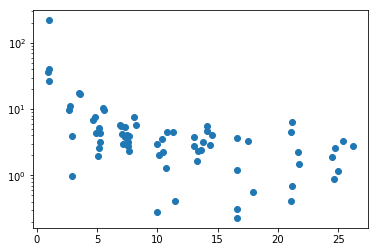

In [51]:
plt.semilogy(dP,erro,'o')
#plt.ylim([0,10])